# 2019년 11월 27일

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<상식>
> Statistical Modeling: The Two Cultures  
Leo Breiman : 유명한 아저씨, RandomForest 만든 사람, 통계학에 큰 공헌한 사람  
http://www2.math.uu.se/~thulin/mm/breiman.pdf

In [26]:
# 내용 둘러보기

dir(cv2.ml)

['ANN_MLP_ANNEAL',
 'ANN_MLP_BACKPROP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_LEAKYRELU',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_RELU',
 'ANN_MLP_RPROP',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_UPDATE_WEIGHTS',
 'ANN_MLP_create',
 'ANN_MLP_load',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_LOGIT',
 'BOOST_REAL',
 'Boost_DISCRETE',
 'Boost_GENTLE',
 'Boost_LOGIT',
 'Boost_REAL',
 'Boost_create',
 'Boost_load',
 'COL_SAMPLE',
 'DTREES_PREDICT_AUTO',
 'DTREES_PREDICT_MASK',
 'DTREES_PREDICT_MAX_VOTE',
 'DTREES_PREDICT_SUM',
 'DTrees_PREDICT_AUTO',
 'DTrees_PREDICT_MASK',
 'DTrees_PREDICT_MAX_VOTE',
 'DTrees_PREDICT_SUM',
 'DTrees_create',
 'DTrees_load',
 'EM_COV_MAT_DEFAULT',
 'EM_COV_MAT_DIAGONAL',
 'EM_COV_MAT_GENERIC',
 'EM_COV_MAT_SPHERICAL',
 'EM_DEFAULT_MAX_ITERS',
 'EM_DEFAULT_NCLUSTERS',
 'EM_START_AUTO_STEP',
 'EM_START_E_STEP',
 'EM_START_M_STEP',
 'EM_create',
 'EM_load',
 'KNEAREST_BRUTE_FORCE',
 'KNEAREST_KDTREE',
 'KNearest_BRUTE_FORCE',
 '

# 더미 데이터셋 생성

In [34]:
trainData = np.random.randint(0, 100, (25,2)).astype(np.float32)
responses = np.random.randint(0, 2, (25,1)).astype(np.float32)

In [35]:
from sklearn.datasets import make_classification

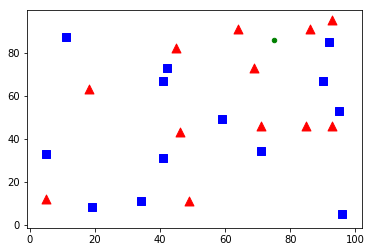

In [37]:
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0], red[:,1], 80, "r", "^")

blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0], blue[:,1], 80, "b", "s")

newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0], newcomer[:,1], 80, "g", ".")

plt.show()

# ml
- openCV가 쬐에끔 더 빠르다.

In [38]:
knn = cv2.ml.KNearest_create()

In [39]:
# 학습

knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)

True

> - sklearn은 기본적으로 row 단위로 데이터가 들어있을 것이라고 가정했다.
- cv는 데이터가 어떻게 들어 있는지를 지정해줘야한다. (layout)
    - cv는 지정을 안하면 에러가 난다.
    - `cv2.ml`에 대문자(상수)로 들어 있다.
        - 상수 값을 보면 axis 개념과 같다.
        - `cv2.ml.ROW_SAMPLE` = 0
        - `cv2.ml.COL_SAMPLE` = 1

- cv는 flag라고 파라미터가 있으면 공식문서에서 찾아봐야 한다.. 
    - C 기반이라서 docstring이 불친절하다. 흑흑
    
- `responses`는 정답데이터.

In [40]:
# 찾기

knn.findNearest(newcomer, k=5)
# predict
# calcerror (?)

(0.0,
 array([[0.]], dtype=float32),
 array([[0., 0., 0., 1., 0.]], dtype=float32),
 array([[146., 146., 205., 290., 405.]], dtype=float32))

In [41]:
ret, results, neighbours, dist = knn.findNearest(newcomer, k=5)

# iris 데이터로 실습

In [42]:
import imutils

In [43]:
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()

In [45]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
knn = cv2.ml.KNearest_create()

In [47]:
# Error

knn.train(iris.data, cv2.ml.ROW_SAMPLE, iris.target.reshape((-1,1)))

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\ml\src\data.cpp:257: error: (-215:Assertion failed) samples.type() == CV_32F || samples.type() == CV_32S in function 'cv::ml::TrainDataImpl::setData'


> - 타입 때문에 에러가 난다.
- cv는 기본적으로 float32를 사용한다.

In [48]:
iris.data.dtype, iris.target.dtype, 

(dtype('float64'), dtype('int32'))

In [49]:
trainData = iris.data.astype(np.float32)
responses = iris.target.astype(np.float32)

In [50]:
knn.train(trainData, cv2.ml.ROW_SAMPLE, responses)

True

In [51]:
ret, results, neighbours, dist = knn.findNearest(trainData, k=5)

In [52]:
# Error

knn.findNearest([3,3,3,3], 3)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

> - matrix 형태로 넣으라고 한다.

In [53]:
# Error

knn.findNearest([[3,3,3,3]], 3)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

> - 입력했던 것처럼 matrix형태로 넣었는데 안된다.
- numpy array로 만들어야하나?

In [54]:
knn.findNearest(np.array([[3,3,3,3]]), 3)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\ml\src\knearest.cpp:312: error: (-215:Assertion failed) test_samples.type() == CV_32F && test_samples.cols == samples.cols in function 'cv::ml::BruteForceImpl::findNearest'


> - array로 하니까 TypeError는 안난다.
- 또 dtype 에러가 났다.

In [55]:
knn.findNearest(np.float32([[3,3,3,3]]), 3)

(1.0,
 array([[1.]], dtype=float32),
 array([[2., 1., 1.]], dtype=float32),
 array([[7.8      , 8.06     , 8.2699995]], dtype=float32))

> - 어렵다 어려워... dtype을 맞추는게 중요하다...cv ml...

# 공식 예제

In [7]:
img = plt.imread("17_digits.png")

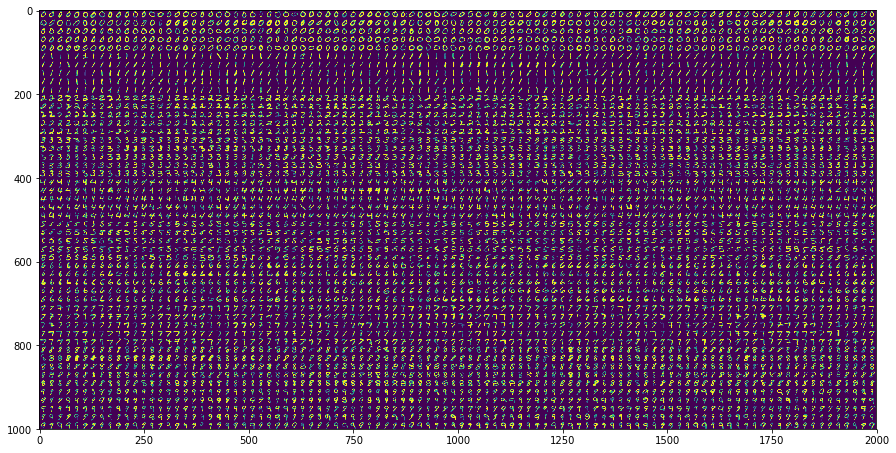

In [8]:
plt.figure(figsize=(15,15))
plt.imshow(img)

> - 전체 데이터를 이미지 하나로 만들어버림!
- 자바에서 많이 사용되는 기법.

In [9]:
img.shape

(1000, 2000)

In [10]:
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]

> - digits.png에는 가로에 100개, 세로에 50개 숫자 이미지가 있다

In [11]:
x = np.array(cells).astype(np.float32)

In [12]:
x.shape

(50, 100, 20, 20)

In [13]:
train = x.reshape(-1, 20*20)

In [14]:
train.shape

(5000, 400)

In [15]:
y = np.repeat(np.arange(10), 500).astype(np.float32)[:,np.newaxis]

> - 각 숫자가 500개씩 있으므로 repeat으로 y를 만들었다.
- newaxis로 2차원으로 만들었다.

In [16]:
train = x[:,:50].reshape(-1, 400).astype(np.float32)
test = x[:,50:100].reshape(-1, 400).astype(np.float32)

> - 가로세로 20x20 이미지이므로 `reshape(-1, 400)`은 `flatten`과 같다.

In [17]:
knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, y)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\ml\src\data.cpp:296: error: (-215:Assertion failed) (layout == ROW_SAMPLE && responses.rows == nsamples) || (layout == COL_SAMPLE && responses.cols == nsamples) in function 'cv::ml::TrainDataImpl::setData'


In [153]:
ret, results, neighbours, dist = knn.findNearest(train, k=5)

In [56]:
# 맞은 개수

(results==y).flatten().sum()

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: 'bool' object has no attribute 'flatten'

In [64]:
matches = results==y
correct = np.count_nonzero(matches)
accuracy = correct*100.0/results.size

In [65]:
accuracy

66.66666666666667

> - cv ml은 scikit 보다 좀 귀찮다.

In [70]:
knn.calcError(trainData, responses) # 수정 필요

TypeError: only size-1 arrays can be converted to Python scalars

> - cv의 `calcError`는 scikit에서의 score와 같다.

# sklearn에서도 똑같이 해보기

In [161]:
# 나중에 복습해보기

# Kmeans
기댓값 최대화 알고리즘(expectation-maximization algorithm, 약자 EM 알고리즘)

참고: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html 

In [164]:
cv2.kmeans

<function kmeans>

> - kmeans는 ml 패키지에 들어있지 않고 그냥 cv2에 있다.

In [163]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1,0)

flags = cv2.KMEANS_RANDOM_CENTERS

In [ ]:
compactness, labels, centers = cv2.kmeans(z, 2, None, criteria, 10, flags)

## Monkey patch

유저 몰래 업데이트되는 기능을 의미하는 용어

### matplotlib에서의 monkey patch
- import 순서에 따라서 기능이 달라진다.
    dir을 보면 알 수 있다.
- import lib에 대해서 알아야하는데 매우 복잡함...
- 예전에는 pylab을 먼저 import했어야 기능을 제대로 사용할 수 있었는데, 유저들의 항의로 통합버전인 pyplot이 만들어졌다.
- 현재 pylab은 공식문서에서도 사용하지 말라고 함.

In [1]:
import matplotlib
len(dir(matplotlib))

109

In [2]:
import matplotlib.pyplot as plt
len(dir(plt))

251

In [3]:
len(dir(matplotlib))

172

pyplot을 import하니까 matplotlib의 기능이 늘어났다.